In [1]:
%load_ext autoreload

In [2]:
%autoreload
from npyx import *

npyx version 2.6.1 imported.


# Load Spike Data

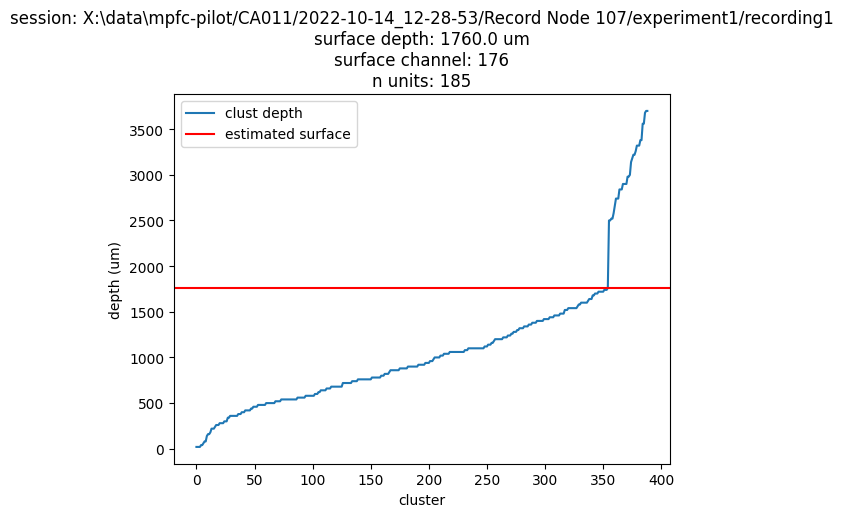

In [6]:
computer_name = os.environ['COMPUTERNAME']
if 'DESKTOP-HT3RNG1' in computer_name:
    data_path = 'D:\spikes'
else:
    data_path = 'X:\data\mpfc-pilot'
#dp = f'{data_path}/CA011/2022-10-13_12-51-32/Record Node 107/experiment1/recording1'
dp = f'{data_path}/CA011/2022-10-14_12-28-53/Record Node 107/experiment1/recording1'
clust = get_units(dp)
clust_info = get_units_info(dp)

# approximate brain surface by looking at where the units are
good_unit_depth = clust_info[clust_info.KSLabel=='good'].depth
surface_depth = np.sort(good_unit_depth)[np.argwhere(np.diff(good_unit_depth)>100)[0][0]]
plt.plot(np.sort(good_unit_depth),label='clust depth')
plt.axhline(surface_depth,color='r',label='estimated surface')
plt.xlabel('cluster')
plt.ylabel('depth (um)')
plt.legend()

# adjust depth to be relative to brain surface
clust_info['adj_depth'] = -(clust_info.depth - surface_depth)

# extract good cells
good = (clust_info.adj_depth > 0) & (clust_info.KSLabel == 'good') & (clust_info.fr > 1)
good_cells = clust_info.cluster_id[good].values
good_cells_info = clust_info.loc[good]
good_cells_info = good_cells_info.reset_index()
fs = 30e3
#spks = [s/fs/60 for s in spks]
len(good_cells)

# get channel of surface depth
channel_map = chan_map(dp, y_orig='tip', probe_version='1.0')
surface_channel = np.abs(np.vstack(channel_map)[:,2] - surface_depth).argmin()
plt.title(f'session: {dp}\nsurface depth: {surface_depth} um\nsurface channel: {surface_channel}\nn units: {len(good_cells)}');

165

True
True
plotting unit 0...
plotting unit 1...
plotting spike 0/1...
plotting unit 2...
plotting unit 3...
plotting unit 4...
plotting unit 5...
plotting unit 6...
plotting unit 7...
plotting unit 8...
plotting spike 0/1...
plotting unit 9...
plotting unit 10...
plotting unit 11...
plotting unit 12...
plotting spike 0/1...
plotting unit 13...
plotting unit 14...
plotting unit 15...
plotting unit 16...
plotting unit 17...
plotting unit 18...
plotting unit 19...
plotting unit 20...
plotting unit 21...
plotting spike 0/2...
plotting spike 1/2...
plotting unit 22...
plotting unit 24...
plotting unit 25...
plotting unit 26...
plotting spike 0/2...
plotting spike 1/2...
plotting unit 27...
plotting spike 0/2...
plotting spike 1/2...
plotting unit 29...
plotting unit 30...
plotting unit 31...
plotting unit 32...
plotting unit 33...
plotting spike 0/1...
plotting unit 35...
plotting unit 36...
plotting unit 37...
plotting unit 38...
plotting unit 39...
plotting unit 40...
plotting unit 41...


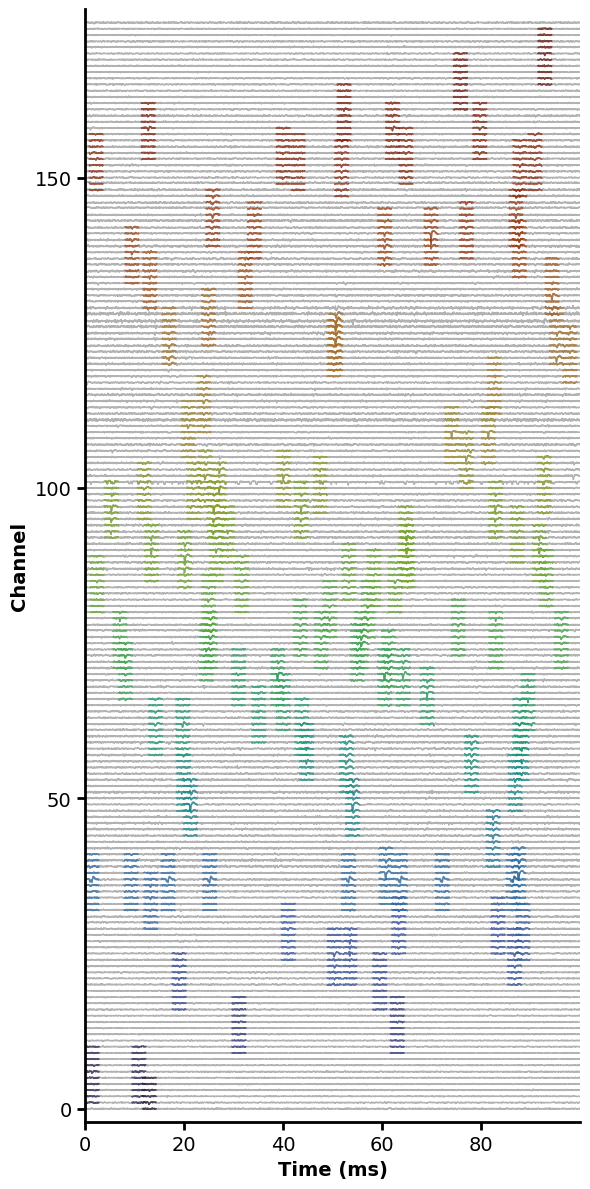

In [7]:
from matplotlib import colors, cm
                        
# get units to plot
units = clust_info

# colormap by peak channel
norm = colors.Normalize(vmin=0, vmax=surface_channel)
cmap = cm.turbo
m = cm.ScalarMappable(norm=norm, cmap=cmap)
color_map = m.to_rgba(clust_info.ch) / 1.5

# raw data are whitened, high-pass filtered and median-subtracted by default - parameters are explicit below
fig = plot_raw_units(dp, times=[902.05,902.15], units = units.cluster_id, channels=range(0,surface_channel),
                     colors = color_map, lw=1, offset=300, figsize=(6,12), Nchan_plot=10,
                     med_sub=1, whiten=1, hpfilt=1, bg_alpha=0.3);
fig.savefig('./results/raw_units.pdf', bbox_inches = 'tight')

True
True
plotting unit 0...
plotting unit 1...
plotting unit 2...
plotting unit 3...
plotting unit 4...
plotting unit 5...
plotting unit 6...
plotting unit 7...
plotting unit 8...
plotting unit 9...
plotting unit 10...
plotting unit 11...
plotting unit 12...
plotting unit 13...
plotting unit 14...
plotting unit 15...
plotting unit 16...
plotting unit 17...
plotting unit 18...
plotting unit 19...
plotting unit 20...
plotting unit 21...
plotting unit 22...
plotting unit 24...
plotting unit 25...
plotting unit 26...
plotting unit 27...
plotting unit 29...
plotting unit 30...
plotting unit 31...
plotting unit 32...
plotting unit 33...
plotting unit 35...
plotting unit 36...
plotting unit 37...
plotting unit 38...
plotting unit 39...
plotting unit 40...
plotting unit 41...
plotting unit 42...
plotting unit 43...
plotting unit 44...
plotting unit 45...
plotting unit 46...
plotting unit 47...
plotting unit 48...
plotting unit 49...
plotting unit 50...
plotting unit 52...
plotting unit 53...


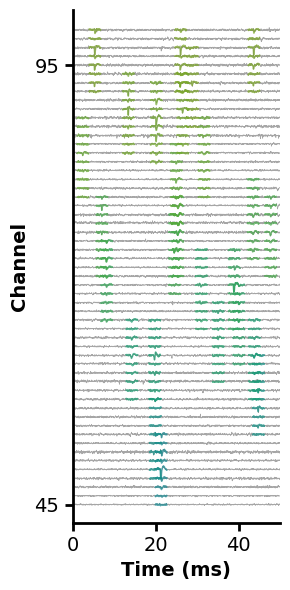

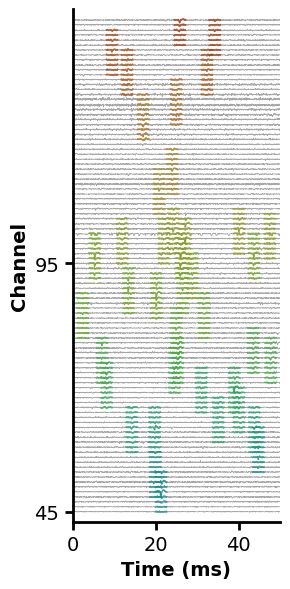

In [8]:
fig = plot_raw_units(dp, times=[902.05,902.1], units = units.cluster_id, channels=range(45,100),
               colors = color_map, lw=0.5, offset=300, figsize=(3,6), Nchan_plot=10,
               med_sub=1, whiten=1, hpfilt=1, bg_alpha=0.35);
fig.savefig('./results/raw_units_45-100.pdf', bbox_inches = 'tight')

fig = plot_raw_units(dp, times=[902.05,902.1], units = units.cluster_id, channels=range(45,145),
               colors = color_map, lw=0.5, offset=300, figsize=(3,6), Nchan_plot=10,
               med_sub=1, whiten=1, hpfilt=1, bg_alpha=0.35);
fig.savefig('./results/raw_units_45-145.pdf', bbox_inches = 'tight')

## Plot waveforms

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


143


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


144


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


90


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


27


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


174


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


115


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


14


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


57


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


0


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


109


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


92


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


134


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


102


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


125


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


97


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


29


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


127


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


75


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


63


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


181


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


34


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


86


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


59


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


13


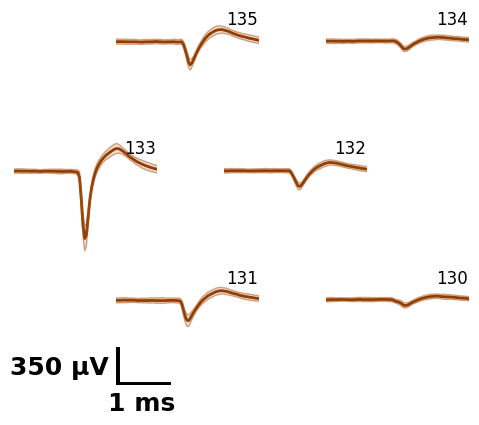

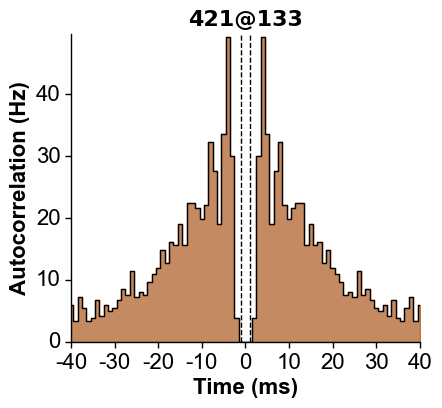

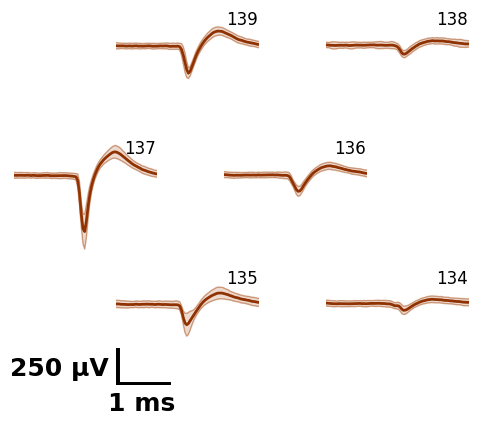

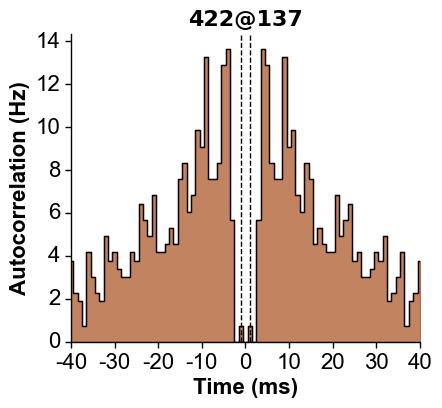

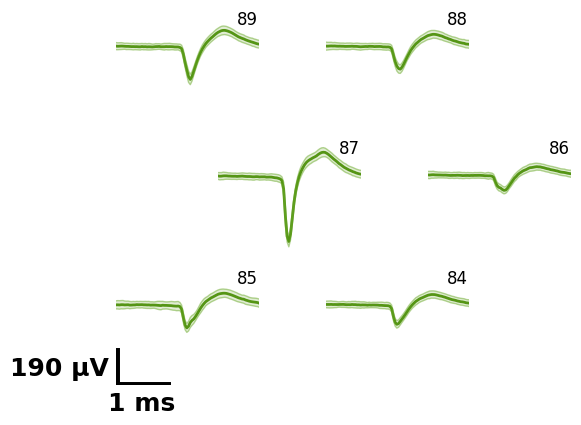

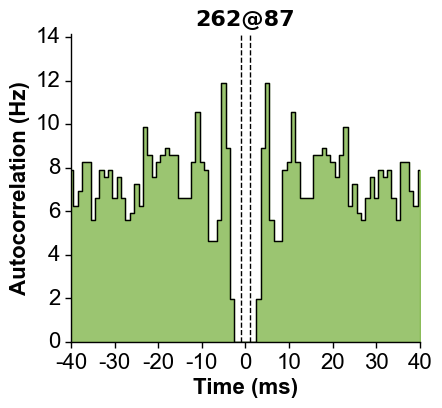

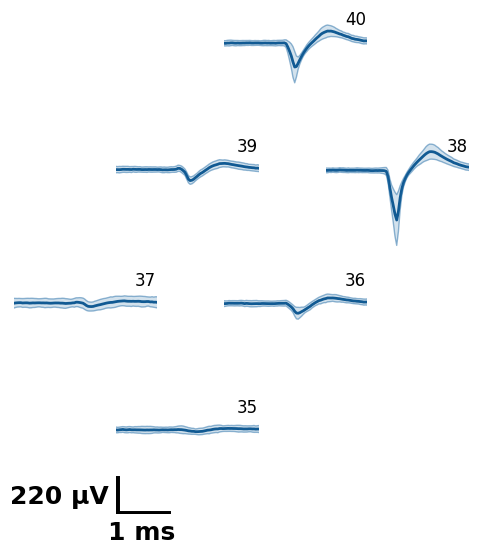

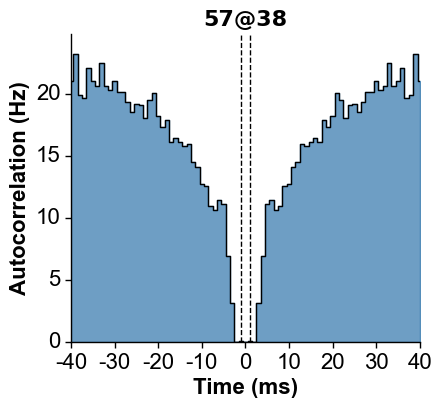

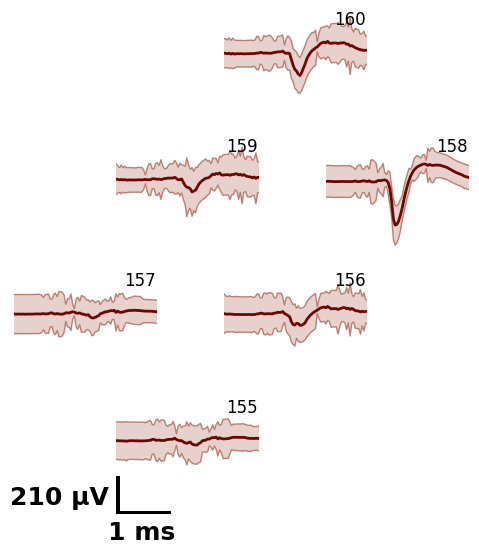

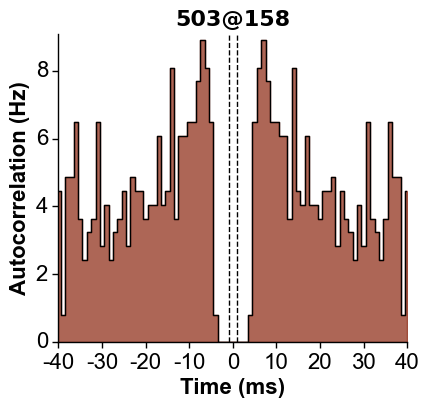

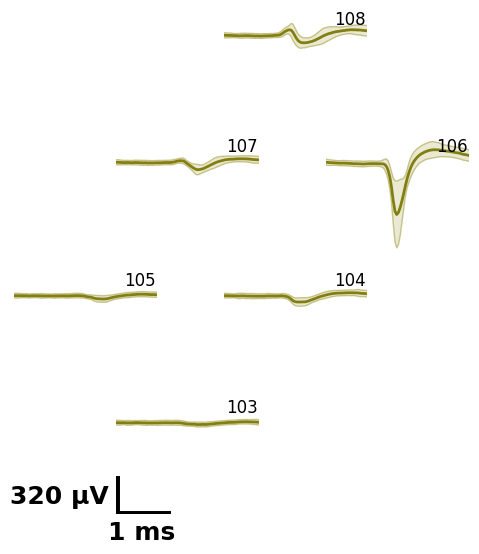

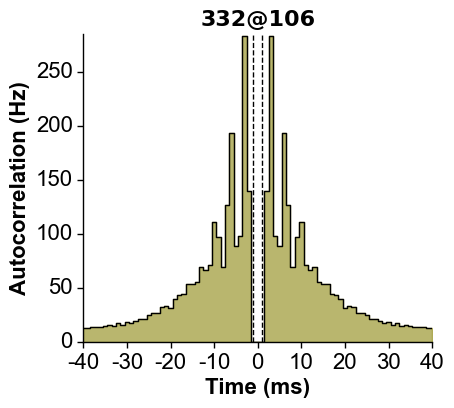

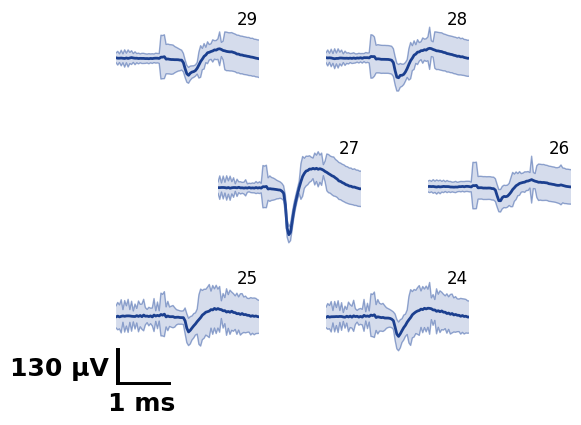

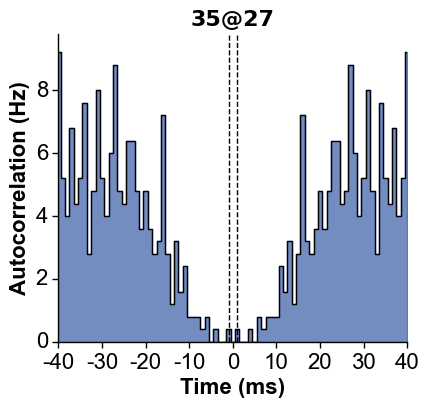

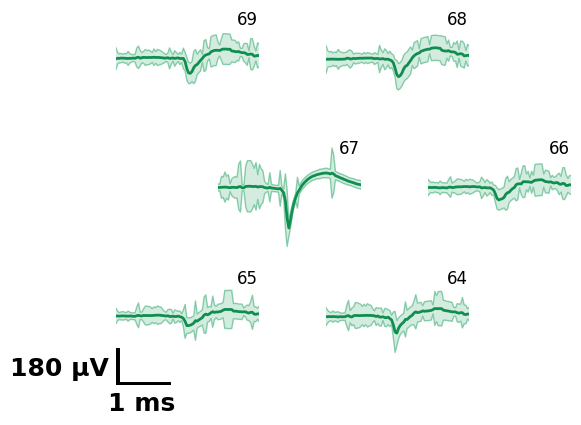

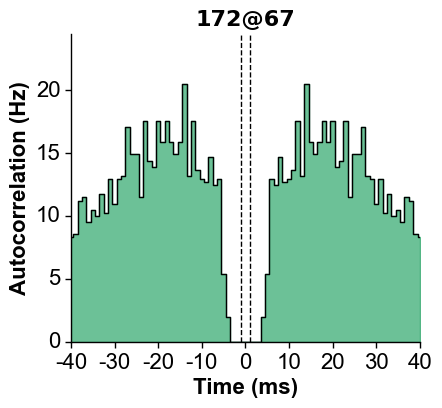

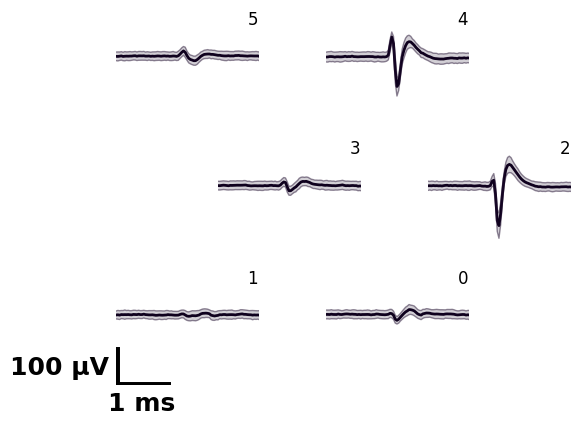

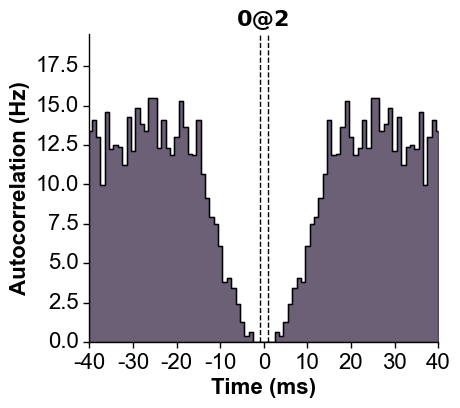

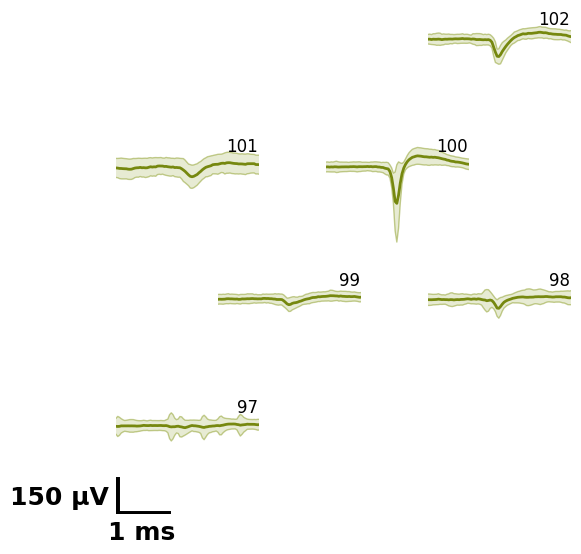

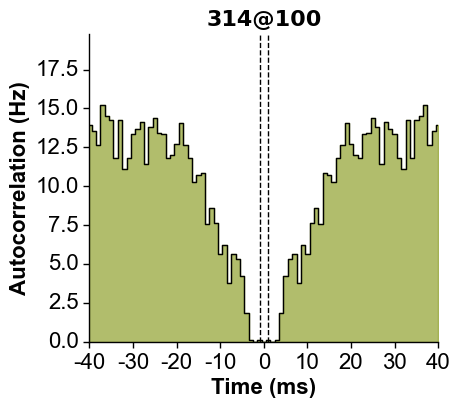

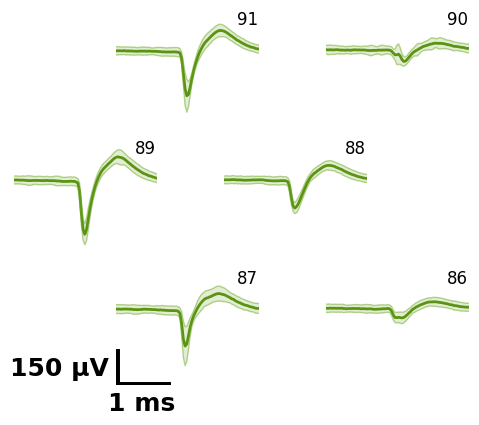

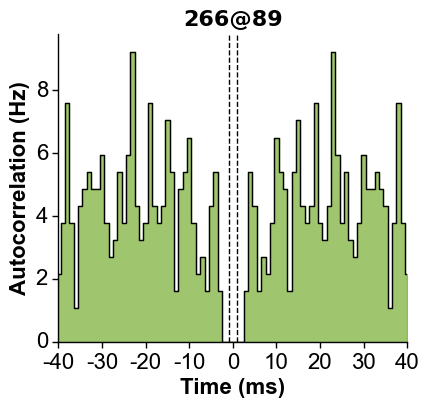

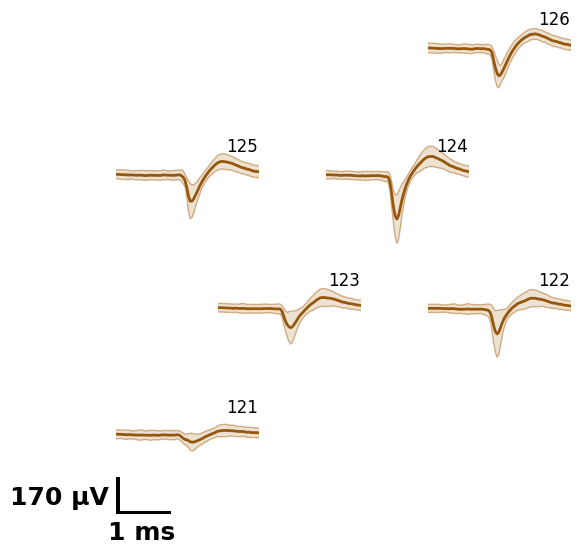

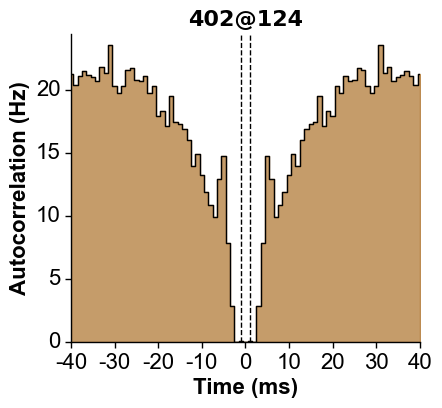

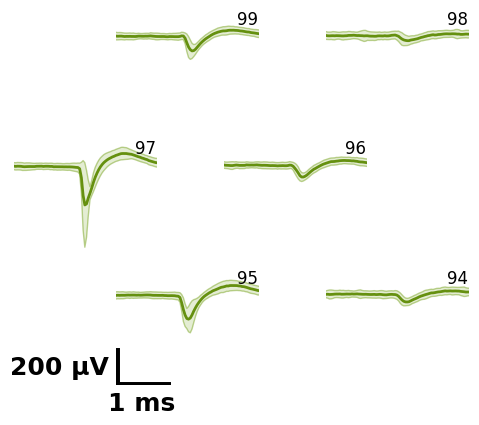

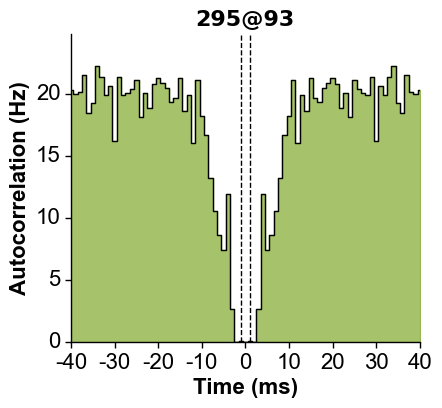

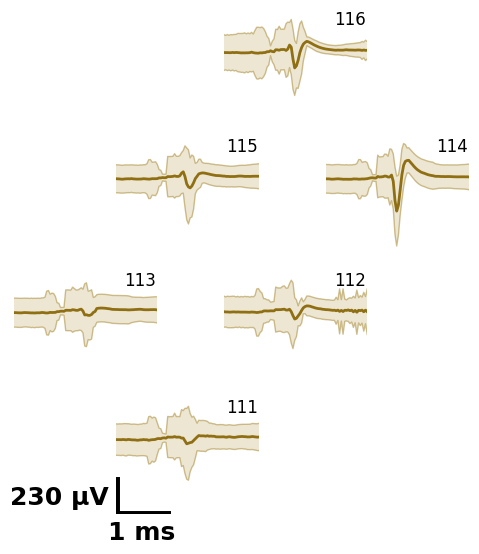

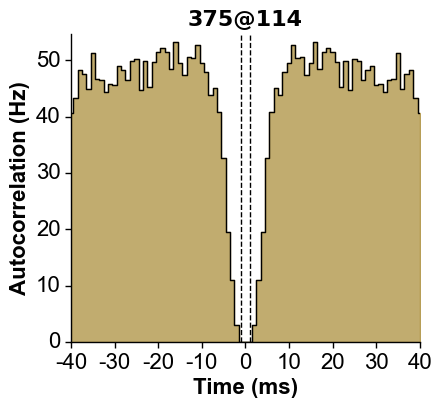

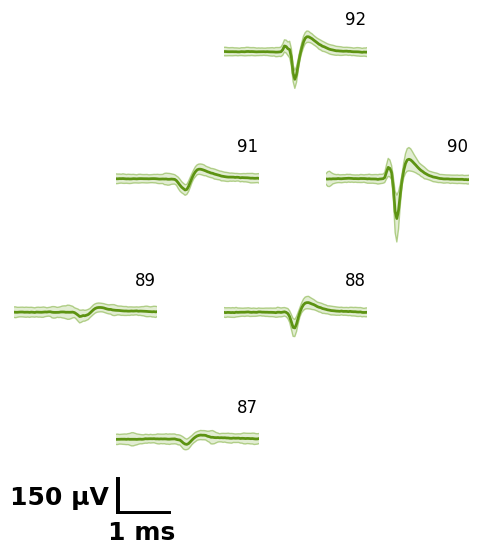

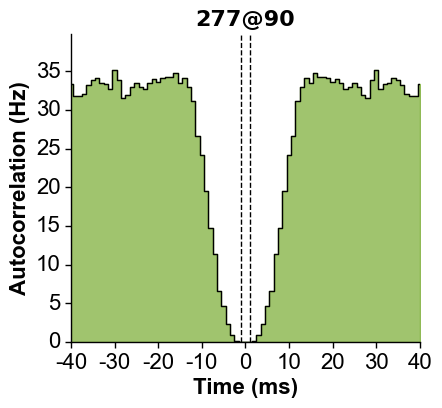

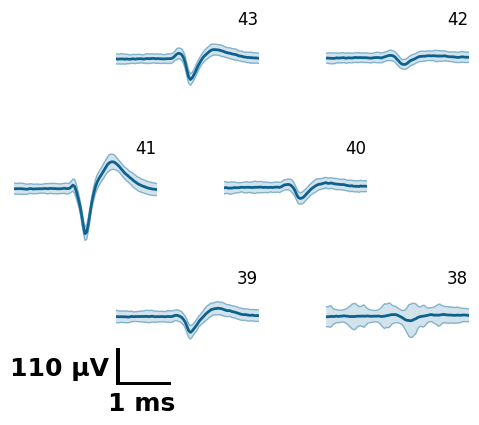

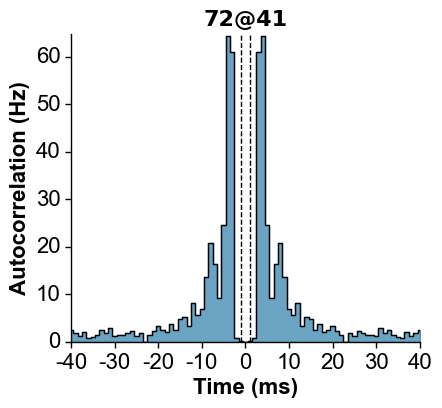

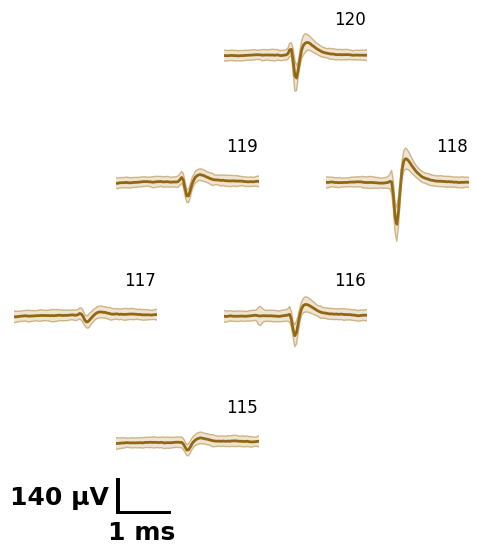

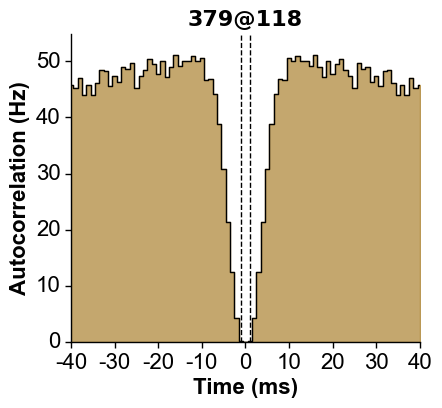

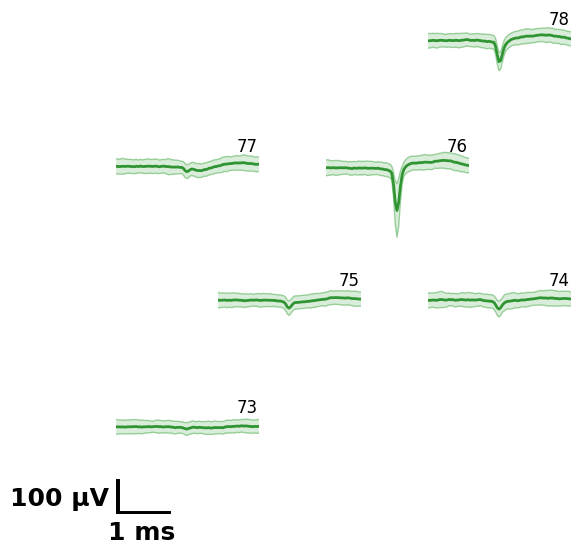

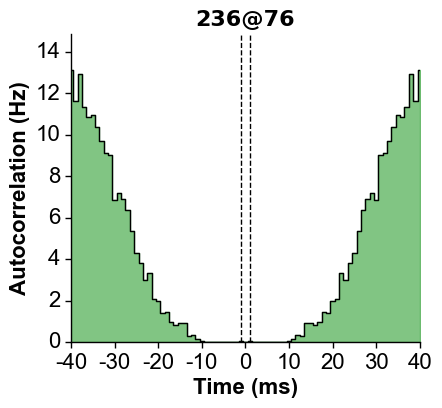

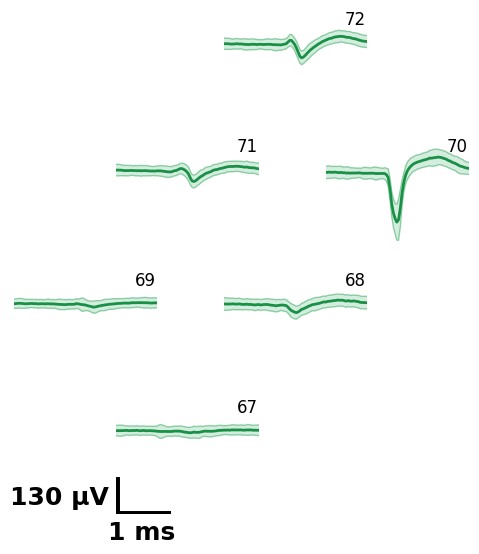

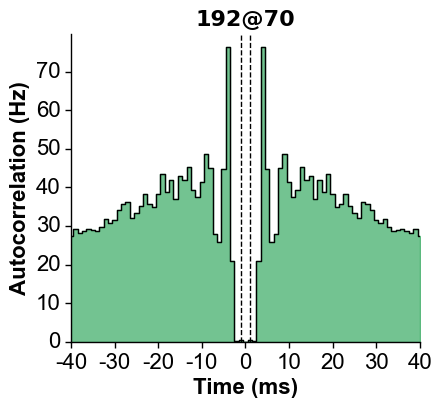

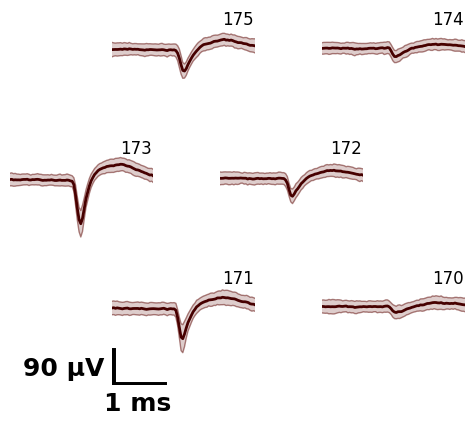

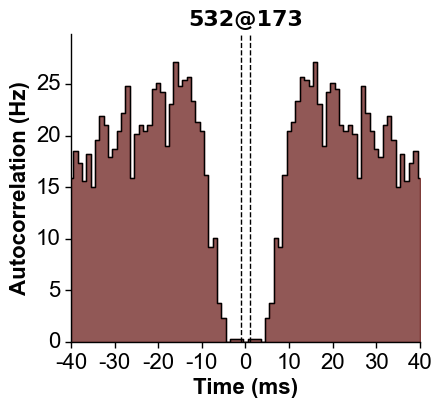

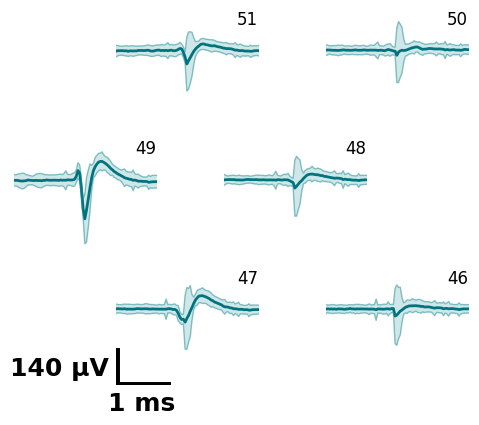

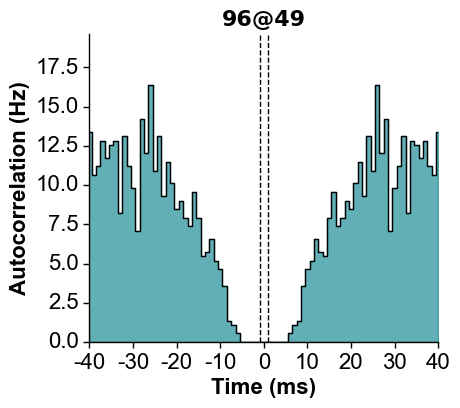

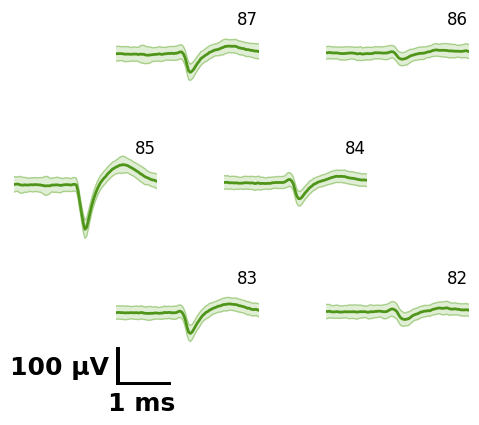

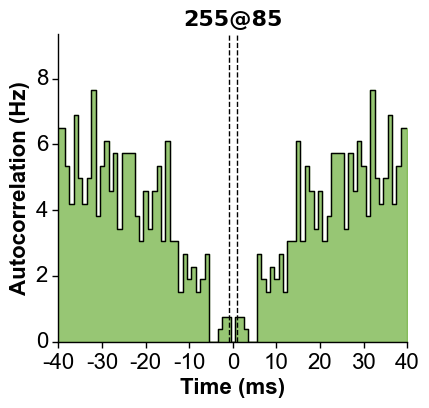

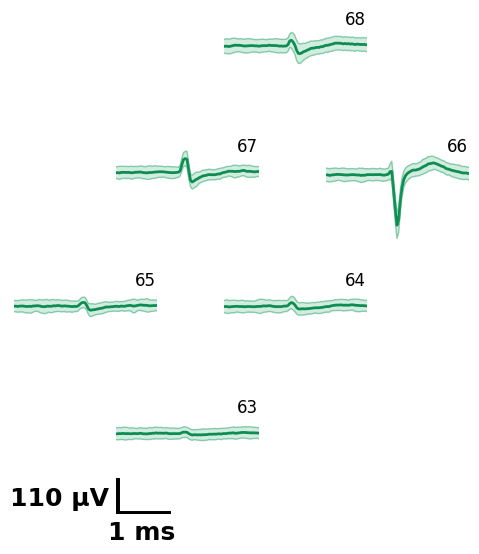

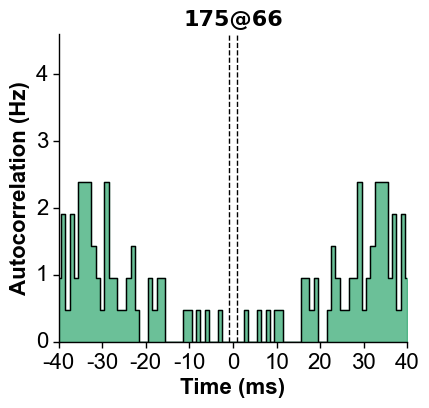

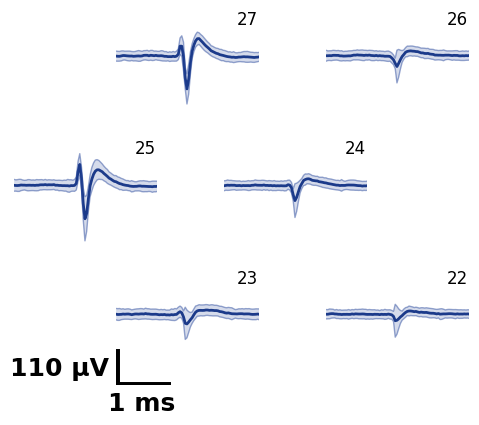

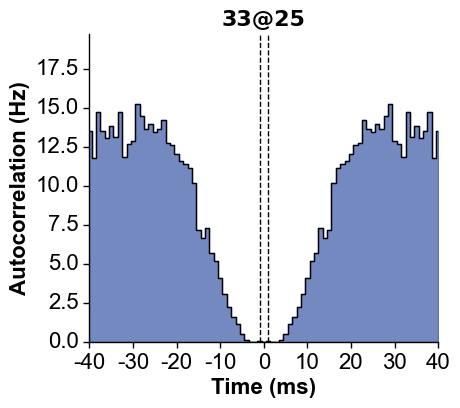

In [9]:
sorti = np.argsort(-good_cells_info.Amplitude).values
color_map = m.to_rgba(good_cells_info.ch) / 1.5

for i in range(24):
    fig = plot_wvf(dp, good_cells[sorti[i]], Nchannels=6, color=color_map[sorti[i]]);
    fig.savefig(f'./results/unit{sorti[i]:04d}_waveform.pdf')
    fig = plot_acg(dp, good_cells[sorti[i]], cbin=1, cwin=80, color=color_map[sorti[i]]);
    fig.savefig(f'./results/unit{sorti[i]:04d}_acg.pdf')
    print(sorti[i])


C:\Users\chris\AppData\Local\Temp\ipykernel_28048\2856513411.py:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[0].scatter(c[1], y, n_units, color, alpha=alpha)


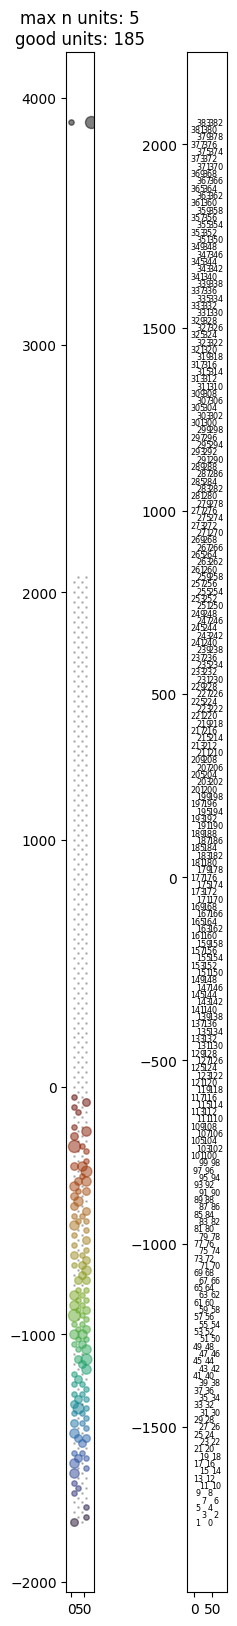

In [10]:
fig, ax = plt.subplots(1,2,figsize=(3,20))
color_map = m.to_rgba(np.vstack(channel_map)[:,0]) / 1.5

unit_size = []
scaler = 15
for c in channel_map:
    #n_units = len(clust_info[(clust_info.ch == c[0]) & (clust_info.KSLabel== 'good')])
    n_units = len(good_cells_info[(good_cells_info.ch == c[0])])
    unit_size.append(n_units)
    if n_units == 0:
        n_units = 1
        alpha = 0.2
        color = 'k'
    else:
        n_units = n_units * scaler
        alpha = 0.5
        color = color_map[c[0]]
    y = c[2]
    y = (c[2] - surface_depth)
    ax[0].scatter(c[1], y, n_units, color, alpha=alpha)
    ax[1].scatter(c[1], y, n_units, 'k', alpha=0)
    ax[1].text(c[1], y, c[0], fontsize='xx-small', ha='center', va='center')
ax[0].scatter(0, 3900, scaler, 'k', alpha=0.5)
ax[0].scatter(80, 3900, np.max(unit_size)*scaler, 'k', alpha=0.5)
ax[0].set_aspect('equal')
ax[0].set_xlim([-20, 90])
ax[0].set_title(f'max n units: {np.max(unit_size)}\ngood units: {np.sum(unit_size)}')
ax[1].set_aspect('equal')
ax[1].set_xlim([-20, 90])

fig.savefig('./results/channel_map.pdf', bbox_inches='tight', dpi=300)

